<a href="https://colab.research.google.com/github/rajeshpahari/Deep-Learning/blob/main/Simple_ANN_Regression_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from IPython import display
display.set_matplotlib_formats('svg')

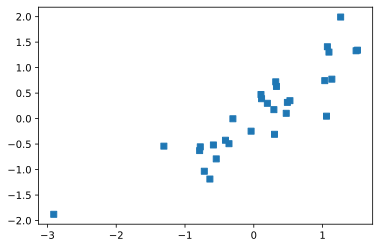

In [55]:
N=30
x=torch.randn(N,1)
y=x+torch.randn(N,1)/2
plt.plot(x,y,'s')
plt.show()

In [56]:
#Build Model
ANNreg=nn.Sequential(
    nn.Linear(1,1),  #input layer... (No of input..x* No of output..y)
    nn.ReLU(), #Activation Layer
    nn.Linear(1,1) #Output layer
)
ANNreg



Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [57]:
#Learning Rate
learningRate=.05

#Lossfunction
lossFunc=nn.MSELoss()


#optimizer
optimizer=torch.optim.SGD(ANNreg.parameters(),lr=learningRate)  #Using Stochastic Gradient Descent

In [58]:
#Train The Model
numepochs=100
losses=torch.zeros(numepochs)

#Train the Model
for epochi in range(numepochs):

  #forward pass
  yHat=ANNreg(x)

  #compute Losses

  loss=lossFunc(yHat,y)
  losses[epochi]=loss

  #backprop

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


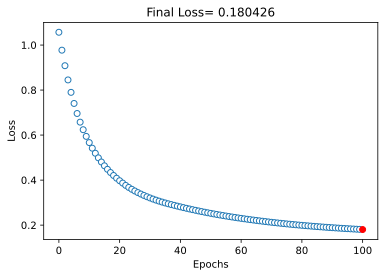

In [59]:
# Show the Losses


##Manually compute losses
## final forward pass
pred=ANNreg(x)


#final Loss(MSE)
testloss=(pred-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',lw=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Final Loss= %g' %testloss.item())
plt.show()

In [60]:
testloss

tensor(0.1804, grad_fn=<MeanBackward0>)

In [61]:
testloss.detach()

tensor(0.1804)

In [62]:
testloss.item()

0.18042613565921783

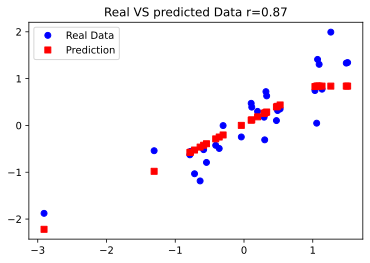

In [63]:
plt.plot(x,y,'bo',label='Real Data')
plt.plot(x,pred.detach(),'rs',label= 'Prediction')
plt.title(f'Real VS predicted Data r={np.corrcoef(y.T,pred.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

## Solve same Proble by using parametric approach by changing slope from [-2,2]

In [65]:
from torch.nn.modules.linear import Linear
#Define a function for model Building & Train the Model

def buildAndTrainANN(x,y):

  #Build
  ANNreg=nn.Sequential(
      nn.Linear(1,1),
      nn.ReLU(),
      nn.Linear(1,1)
  )

  #Loss and Optimizer
  lossfunc=nn.MSELoss()
  optimizer=torch.optim.SGD(ANNreg.parameters(),lr=.05)


  #Train the model
  numepochs=500
  losses=torch.zeros(numepochs)

  for epochi in range(numepochs):

    #forwardpass
    yHat=ANNreg(x)
    loss=lossfunc(yHat,y)
    losses[epochi]=loss

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #end of training loop

  #compute Model prediction
  pred=ANNreg(x)

  #output
  return pred,losses


In [70]:
# Define a Function that creates Data
def createTheData(m):
  N=50
  x=torch.randn(N,1)
  y=m*x+torch.randn(N,1)/2
  return x,y

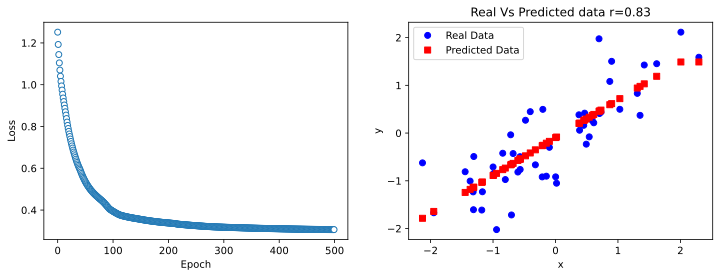

In [78]:
#Test it once

#Create data
x,y=createTheData(.8)
yHat,losses=buildAndTrainANN(x,y)

fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(losses.detach(),'o',markerfacecolor='w',lw=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')


ax[1].plot(x,y,'bo',label='Real Data')
ax[1].plot(x,yHat.detach(),'rs',label='Predicted Data')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'Real Vs Predicted data r={np.corrcoef(y.T,yHat.detach().T)[0,1]:.2f}')
ax[1].legend()


plt.show()




In [79]:
# For the Experiment
## Take 3 mins with 21 slopes and 50 exp
slopes=np.linspace(-2,2,21)
numExp=50

#initialize output matrix
results=np.zeros((len(slopes),numExp,2))

for slopei in range(len(slopes)):
  
  for N in range(numExp):

    #Create Dataset and Run the Model
    x,y=createTheData(slopes[slopei])
    yHat,losses=buildAndTrainANN(x,y)


    #Store the final Loss and Performance
    results[slopei,N,0]=losses[-1]
    results[slopei,N,1]=np.corrcoef(y.T,yHat.detach().T)[0,1]

#corelation can be 0 if model din't do well. Set nan's>0
results[np.isnan(results)]=0


/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


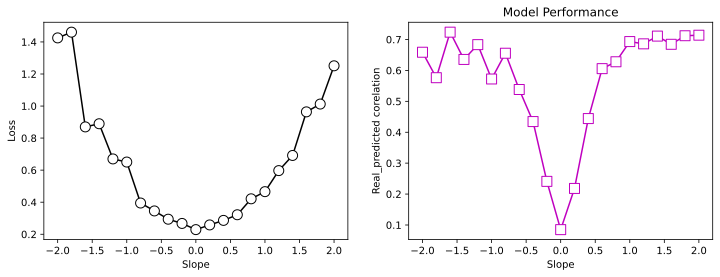

In [80]:
from matplotlib import markers
#Plot the resuls
fig,ax=plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_ylabel('Loss')


ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real_predicted corelation')
ax[1].set_title('Model Performance')

plt.show()
